In [2]:
%pip install tensorflow



Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_excel('predict_energy_consumption.xlsx', engine='openpyxl')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [3]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1),
])

C:\Users\knimj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 87209.4609 - mae: 266.5240 - val_loss: 83914.3594 - val_mae: 259.4156
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92604.2891 - mae: 275.9271 - val_loss: 83690.3125 - val_mae: 258.9777
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87631.9609 - mae: 267.1245 - val_loss: 83470.2969 - val_mae: 258.5439
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94237.7500 - mae: 280.3108 - val_loss: 83202.7656 - val_mae: 258.0182
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90412.3750 - mae: 272.2806 - val_loss: 82894.2031 - val_mae: 257.4095
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85641.3125 - mae: 262.6801 - val_loss: 82533.0156 - val_mae: 256.6955
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87408.0859 - mae: 267.1005 - val_loss: 82102.7344 - val_mae: 255.8407
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88838.3438 - mae: 268.2842 - val_loss: 81599.

In [7]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {test_loss}, Test MAE: {test_mae}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18875.5566 - mae: 117.5220  
Test loss: 18972.927734375, Test MAE: 117.76188659667969


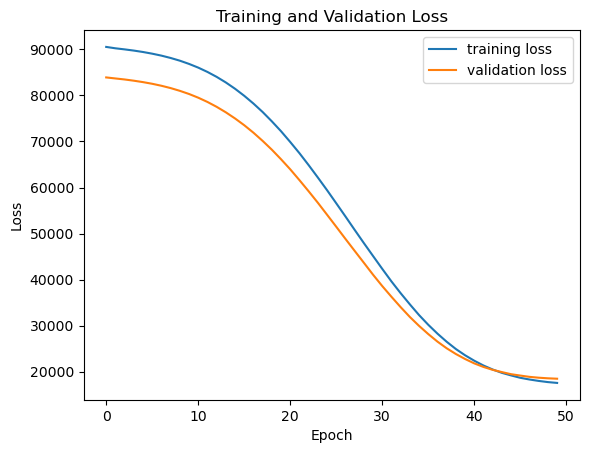

In [8]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[294.27118],
       [215.66638],
       [229.64941],
       [205.00742],
       [304.80768],
       [276.76425],
       [295.8394 ],
       [252.1437 ],
       [268.10724],
       [266.5764 ],
       [223.8489 ],
       [230.78421],
       [254.84492],
       [221.09947],
       [264.71735],
       [294.01474],
       [240.16116],
       [321.6678 ],
       [292.59384],
       [234.41719],
       [255.43616],
       [274.1227 ],
       [274.28308],
       [259.12268],
       [233.24963],
       [223.4092 ],
       [242.43736],
       [307.08276],
       [289.83273],
       [237.79723],
       [214.64188],
       [283.6808 ],
       [281.09103],
       [248.81712],
       [301.87018],
       [275.95856],
       [214.8163 ],
       [256.03162],
       [281.2318 ],
       [210.76857],
       [239.83682],
       [231.71733],
       [240.29417],
       [250.33853],
       [247.3889 ],
       [252.7879 ],
       [229.45999],
       [237.34738],
       [263.34012],
       [278.75217],


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


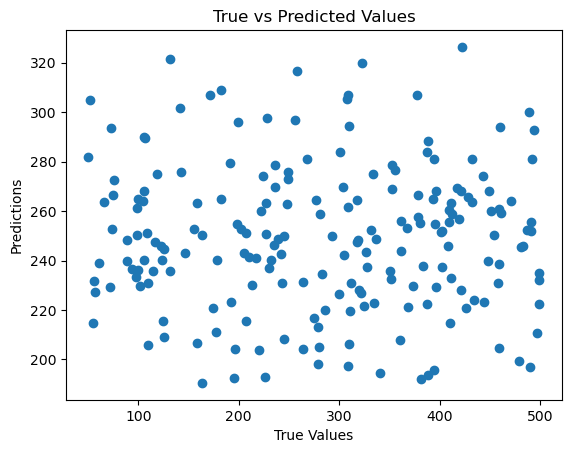

In [10]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()